In [1]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

2023-01-29 23:28:51.246388: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))

In [6]:
y_train.shape

(60000,)

In [7]:
num_count = np.zeros(10)

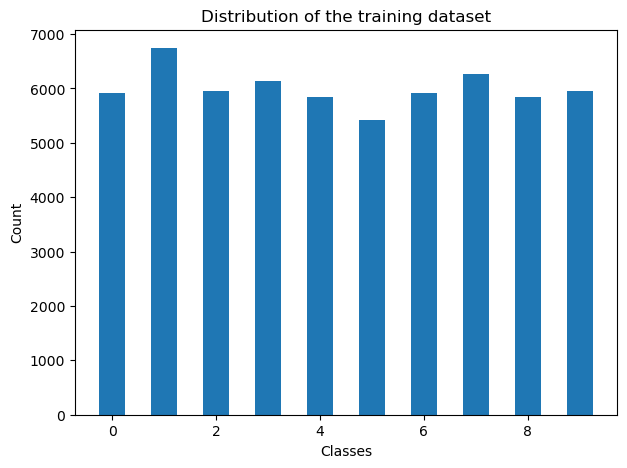

In [8]:
for i in y_train:
    num_count[i] += 1

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
y_label = list(set(y_train))
plt.bar(y_label,num_count,width=0.5)
plt.title("Distribution of the training dataset")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


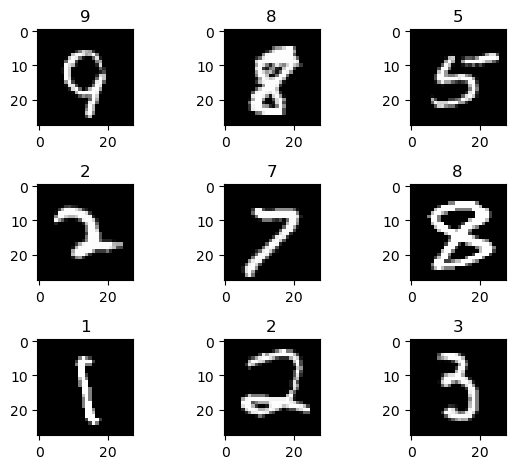

In [10]:
fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        rand_num = np.random.randint(0,60000)
        ax[i,j].imshow(X_train[rand_num],cmap='gray')
        ax[i,j].set_title(y_train[rand_num])
        plt.tight_layout()

In [11]:
X_test = X_test.reshape((X_test.shape[0],28,28,1))
input_shape = (28,28,1)
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
X_train = X_train/255
X_test = X_test/255

Creating the Model

In [63]:
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2359552   
                                                      

In [64]:
X_test.shape

(10000, 28, 28, 1)

In [65]:
model.fit(X_train,y_train,epochs=10,verbose=1,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/10
469/469 [==============================] - 43s 90ms/step - loss: 0.1946 - accuracy: 0.9387 - val_loss: 0.0467 - val_accuracy: 0.9848
Epoch 2/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0361 - val_accuracy: 0.9876
Epoch 3/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 4/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0302 - val_accuracy: 0.9905
Epoch 5/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0282 - val_accuracy: 0.9917
Epoch 6/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0307 - val_accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0263 - val_accuracy:

In [79]:
model.save('Digit_Recog_model')

INFO:tensorflow:Assets written to: Digit_Recog_model/assets


INFO:tensorflow:Assets written to: Digit_Recog_model/assets


In [68]:
score = model.evaluate(X_test,y_test,verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.0273 - accuracy: 0.9921


In [109]:
print("Test Loss = {}".format(score[0]))
print("Test Accuracy = {}".format(score[1]))

Test Loss = 0.027320440858602524
Test Accuracy = 0.9921000003814697


In [120]:
rand_arr = np.random.randint(0,10000,9)
pred_values = np.zeros(9)
for i in range(9):
    to_pred = X_test[rand_arr[i]]
    to_pred = to_pred.reshape((1,28,28,1))
    Y = model.predict(to_pred,verbose=0)
    pred_values[i] = np.argmax(Y)

Predicting random values 

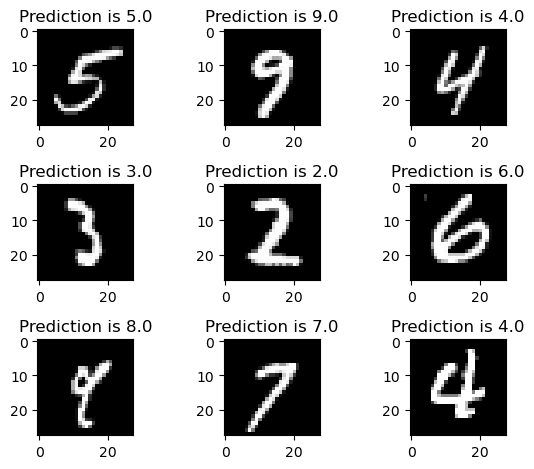

In [137]:
rand_arr = rand_arr.reshape((3,3))
pred_values = pred_values.reshape(3,3)
fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(X_test[rand_arr[i][j]],cmap='gray')
        ax[i,j].set_title("Prediction is {}".format(pred_values[i][j]))
        plt.tight_layout()